In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [100, 5]
from scipy.signal import savgol_filter
from scipy.signal import find_peaks

In [60]:
df = pd.read_excel("~/Downloads/raw_data_sample.xlsx", header=0, dtype=np.float, nrows=None) # path to the excel file
df = df.rename_axis('Index')
df

,Time,Voltage,Torque
Index,,,
0,3.635193e+09,1.423867,4.021883
1,3.635193e+09,1.402393,3.961228
2,3.635193e+09,1.534709,4.334971
3,3.635193e+09,1.492078,4.214553
4,3.635193e+09,1.475657,4.168169
5,3.635193e+09,1.519236,4.291264
6,3.635193e+09,1.528709,4.318023
7,3.635193e+09,1.538499,4.345675
8,3.635193e+09,1.562183,4.412574


In [61]:
time = df['Time'].to_numpy() # extract time data to an array
torque = df['Torque'].to_numpy() # load torque data to an array
print('Time shape', time.shape)
print('Torque shape', torque.shape)
assert time.shape == torque.shape # make sure time and torque arrays have same length

Time shape (28280,)
Torque shape (28280,)


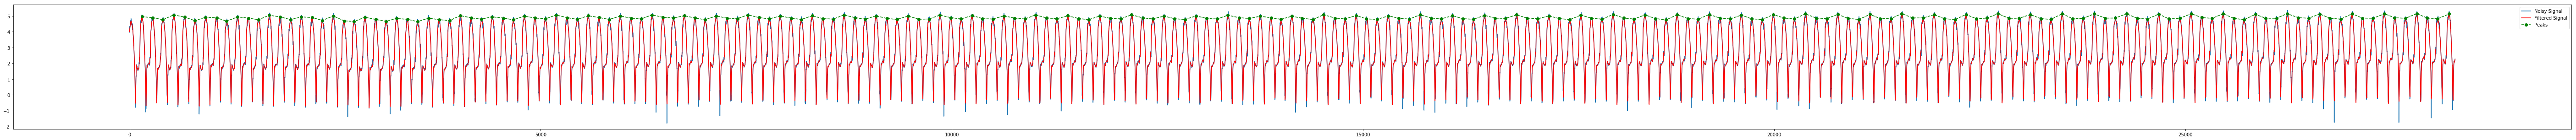

In [62]:
torque_hat = savgol_filter(torque, 11, 3) # window size 11, polynomial order 3
peaks, _ = find_peaks(torque_hat, prominence=1)

plt.plot(torque, label='Noisy Signal')
plt.plot(torque_hat, color='red', label='Filtered Signal')
plt.plot(peaks, torque_hat[peaks], marker="o", color='green', linestyle='--', label='Peaks')
plt.legend()
plt.show()

In [63]:
print("{} peaks found!".format(len(peaks)))
peak_values = [torque_hat[i] for i in peaks]
peak_values

217 peaks found!


[4.952901044289058,
 4.890676095571108,
 4.7607054405594535,
 5.067350230769246,
 4.9245256899767025,
 4.700152167832181,
 4.916864000000013,
 4.881386083916097,
 4.670468923076936,
 4.938294668997683,
 4.863290314685328,
 4.761285561771576,
 5.04148450582752,
 4.941594212121226,
 4.765537459207472,
 4.938045079254093,
 4.899119778554792,
 4.717588328671342,
 4.997151142191156,
 4.68930887878789,
 4.648797421911436,
 4.917626752913767,
 4.778588771561784,
 4.6582268111888245,
 4.83789882517484,
 4.786196885780899,
 4.640442934731947,
 4.8629618834498975,
 4.7624500792540925,
 4.707072097902111,
 5.023927680652695,
 4.878061205128218,
 4.797214762237775,
 4.9440642191142326,
 4.865072489510502,
 4.757686547785561,
 4.983650724941739,
 4.872181393939407,
 4.811002212121227,
 5.058972827505841,
 4.892534920745935,
 4.78325903729605,
 5.01225454545456,
 4.8984232074592216,
 4.777823790209804,
 4.995390107226122,
 4.858566550116564,
 4.810322445221459,
 5.067308620046635,
 4.916094515151529